In [1]:
import galapy as gp
import galapy.internal.CPyCSP as ccsp

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
gp.SSP_LIB['bc03.basel.chab.extend']

'/home/tomi/.venvs/test_setups/lib/python3.8/site-packages/galapy/internal/data/BC03/basel_chab_zero_extended.dat'

In [5]:
intuple = ccsp.loadSSP( gp.SSP_LIB['bc03.basel.chab.extend'] )

In [6]:
ll, tt, zz, LL = intuple

In [7]:
np.asarray( ll, dtype=np.float64 )

array([1.00000000e+00, 1.90000000e+00, 2.80000000e+00, ...,
       9.35677207e+09, 9.67304092e+09, 1.00000000e+10])

In [8]:
LL

array([0., 0., 0., ..., 0., 0., 0.])

In [9]:
ll[:100]

array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ,
       10.9, 11.8, 12.7, 13.6, 14.5, 15.4, 16.3, 17.2, 18.1, 19. , 19.9,
       20.8, 21.7, 22.6, 23.5, 24.4, 25.3, 26.2, 27.1, 28. , 28.9, 29.8,
       30.7, 31.6, 32.5, 33.4, 34.3, 35.2, 36.1, 37. , 37.9, 38.8, 39.7,
       40.6, 41.5, 42.4, 43.3, 44.2, 45.1, 46. , 46.9, 47.8, 48.7, 49.6,
       50.5, 51.4, 52.3, 53.2, 54.1, 55. , 55.9, 56.8, 57.7, 58.6, 59.5,
       60.4, 61.3, 62.2, 63.1, 64. , 64.9, 65.8, 66.7, 67.6, 68.5, 69.4,
       70.3, 71.2, 72.1, 73. , 73.9, 74.8, 75.7, 76.6, 77.5, 78.4, 79.3,
       80.2, 81.1, 82. , 82.9, 83.8, 84.7, 85.6, 86.5, 87.4, 88.3, 89.2,
       90.1])

In [10]:
csp = ccsp.CCSP(ll,tt,zz,LL)

In [11]:
LL.shape[0] / (tt.shape[0]*zz.shape[0])

2223.0

In [12]:
csp.SSP( ll.shape[0]-200 +100, 100, 0 )

0.0

In [13]:
print( '{0:.3e}\t{1:.3e}\t{2:.3e}'.format(tt[10], tt[100], tt[220]))

3.548e+05	3.700e+07	2.000e+10


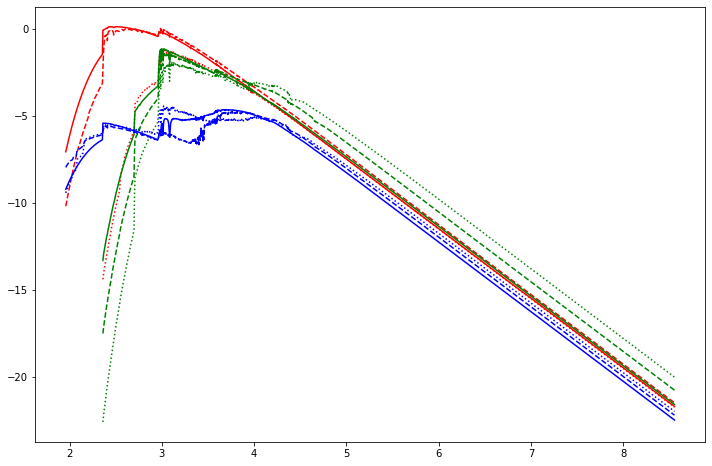

In [14]:
itv, stv = [ 10, 100, 220 ], [ 'r', 'g', 'b' ]
izv, szv = [ 0, 3, 6 ], [ '-', '--', ':' ]
#plt.ylim(-10,1)
plt.figure(figsize=(12,8))
#plt.xlim(1,7)
for it, st in zip( itv, stv ) :
    for iz, sz in zip( izv, szv ) :
        plt.plot( np.ma.log10( ll ), np.ma.log10( [ csp.SSP( il, it, iz ) for il in range( ll.shape[0] ) ] ), 
                  color=st, linestyle=sz )

In [15]:
import galapy.internal.CPySFH as csfh

In [16]:
sfh = csfh.CSFH( 1.e+10 )

In [17]:
help(sfh.Mstar)

Help on built-in function Mstar:

Mstar(...) method of CPySFH.CSFH instance
    Function computing the galaxy stellar mass at given time.
    It approximates the integral:
    
    .. math:
            M_\ast(\tau') = \int_0^{\tau'}\text{d}\tau \bigl[1 - \mathcal{R}_\text{IMF}(\tau)\bigr]\psi(\tau)
    
    Parameters
    ----------
    tau : float
            galactic age
    
    npoints : int
            thinness for approximated integral computation
    
    Returns
    -------
    M* : float
            the stellar mass of the galaxy at time `tau`



In [18]:
out = sfh.time_grid( 1.e+7, tt, zz )

In [19]:
csp.set_params( *out )

In [20]:
np.arange( len(ll), dtype=np.uint64 )

array([   0,    1,    2, ..., 2220, 2221, 2222], dtype=uint64)

In [21]:
help(csp.emission)

Help on built-in function emission:

emission(...) method of CPyCSP.CCSP instance
    Computes the CSP emission at given index in the wavelenght-grid.
    It approximates the integral:
    
    .. math:
            L_\lambda^\text{CSP,unatt}(\tau') = \int_0^{\tau'}\text{d}\tau F(\tau)\cdotL_\lambda^\text{SSP}\bigl[\tau, Z_\ast(\tau'-\tau)\bigr]\psi(\tau'-\tau)
    
    Parameters
    ----------
    il : array or scalar int
            index (or array of indexes) of the positions in the wavelenght-grid for which to compute the emission.
    
    Ftau : array
            array containing a function of time to convolve the integrand with (must have same dimension of the SSP's time-grid)
    
    Returns
    -------
    L_CSP : array or scalar float
            the emission of the galaxy's CSP filtered by the function of time :math:`F(\tau)`



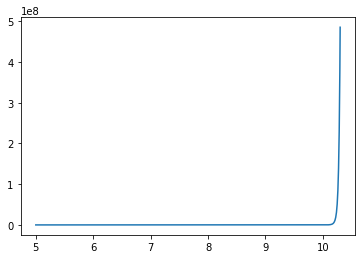

In [22]:
plt.plot(np.ma.log10(tt), np.exp(1.e-9 * tt))

In [23]:
ages = [ 1.e+7, 1.e+8, 1.e+9 ]
Lcsp = []

for age in ages :
    psi, zstar, izl, itl = sfh.time_grid(age, tt, zz )

    csp.set_params( psi, zstar, izl, itl )

    Lcsp += [ csp.emission( np.arange( len(ll), dtype = np.uint64 ) ) ]

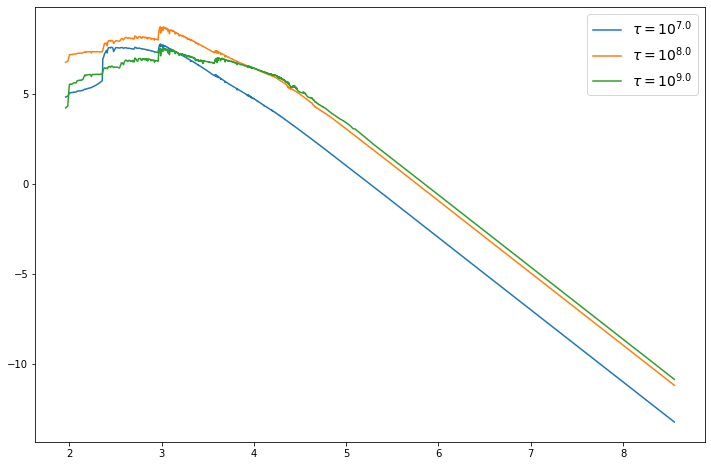

In [24]:
plt.figure(figsize=(12,8))
for LL, age in zip( Lcsp, ages ) :
    plt.plot( np.ma.log10( ll ), np.ma.log10( LL ), label = f'$\\tau = 10^{{{np.log10(age):.1f}}} $' )
plt.legend(fontsize=14)

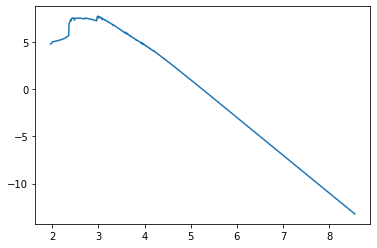

In [25]:
ages = [ 1.e+7, 1.e+8, 1.e+9 ]
age = ages[0]
psi, zstar, izl, itl = sfh.time_grid(age, tt, zz )

csp.set_params( psi, zstar, izl, itl )
ftau = np.exp(1.e-8 * tt) 

LL = csp.emission( np.arange( len(ll), dtype = np.uint64 ) )
Lf = csp.emission( np.arange( len(ll), dtype = np.uint64 ), ftau )
plt.plot(np.ma.log10(ll), np.ma.log10(LL))

In [26]:
Lf[100:-100]

array([6.71215024e+04, 7.26475619e+04, 7.45508611e+04, ...,
       1.62241836e-12, 3.20471426e-13, 6.33105568e-14])

In [27]:
diff = LL-Lf
np.any( diff>0.0 ), diff.max(), diff[100:-100]

(False,
 0.0,
 array([-2.73308794e+03, -2.95621433e+03, -3.03265928e+03, ...,
        -6.22212336e-14, -1.22905358e-14, -2.42784018e-15]))

# tests

In [28]:
%%time
csp.set_params( *sfh.time_grid( 1.e+7, tt, zz ) )
csp.emission( np.arange( len(ll), dtype = np.uint64 ) )

CPU times: user 535 µs, sys: 527 µs, total: 1.06 ms
Wall time: 1.03 ms


array([0., 0., 0., ..., 0., 0., 0.])

# 